In [76]:
# Dataset : https://www.kaggle.com/datasets/yasserh/walmart-dataset?resource=download

#Importing the necessary Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import utils
from sklearn import preprocessing
lab = preprocessing.LabelEncoder()
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt



In [2]:
# Read the csv data into a pandas dataframe and display the first 5 samples

df= pd.read_csv('Walmart.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
# Information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
#  Display Number of columns & Rows

df.shape

(6435, 8)

In [5]:
# Checking if any columns have missing data

df.isna().sum()


Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

C:\Users\runvi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\runvi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\runvi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

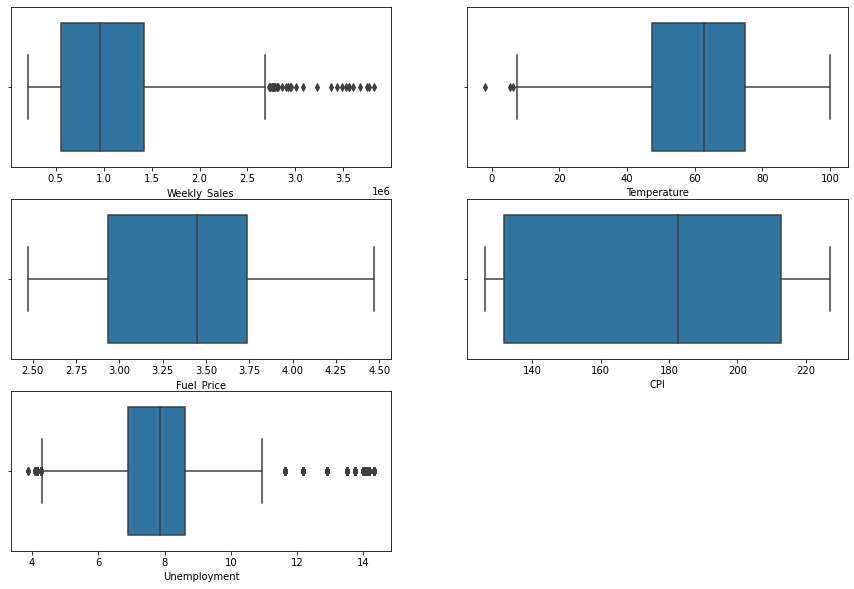

In [108]:
#checking outliers with the help of Boxplot

pno = 1
plt.figure(figsize=(15,10))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
        if pno<=5:
            plt.subplot(3,2,pno);
            pno+=1
            sns.boxplot(df[i]);
            plt.xlabel(i);


In [109]:
#treating outliers with the help of upper whisker and lower whisker.

def outlier_treatment():
    l = ["Weekly_Sales","Temperature","Unemployment"]
    for i in l:
        x = np.quantile(df[i],[0.25,0.75])
        iqr = x[1]-x[0]
        uw = x[1]+1.5*iqr
        lw = x[0]-1.5*iqr
        df[i]  = np.where(df[i]>uw,uw,(np.where(df[i]<lw,lw,df[i])))
        
outlier_treatment()


C:\Users\runvi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\runvi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\runvi\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will

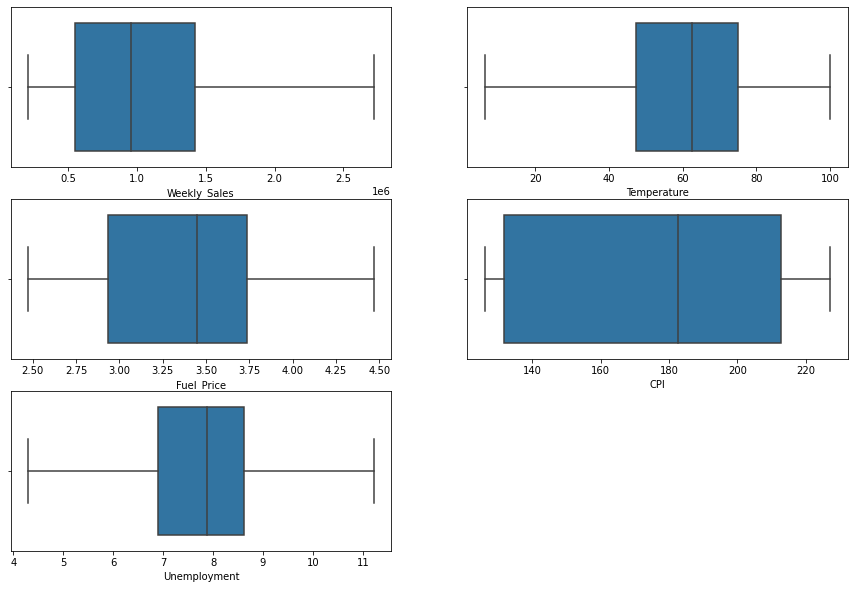

In [110]:
# Plotting the box plot to check the treated outliers

pno = 1
plt.figure(figsize=(15,10))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment"]:
        if pno<=5:
            plt.subplot(3,2,pno);
            pno+=1
            sns.boxplot(df[i]);
            plt.xlabel(i);


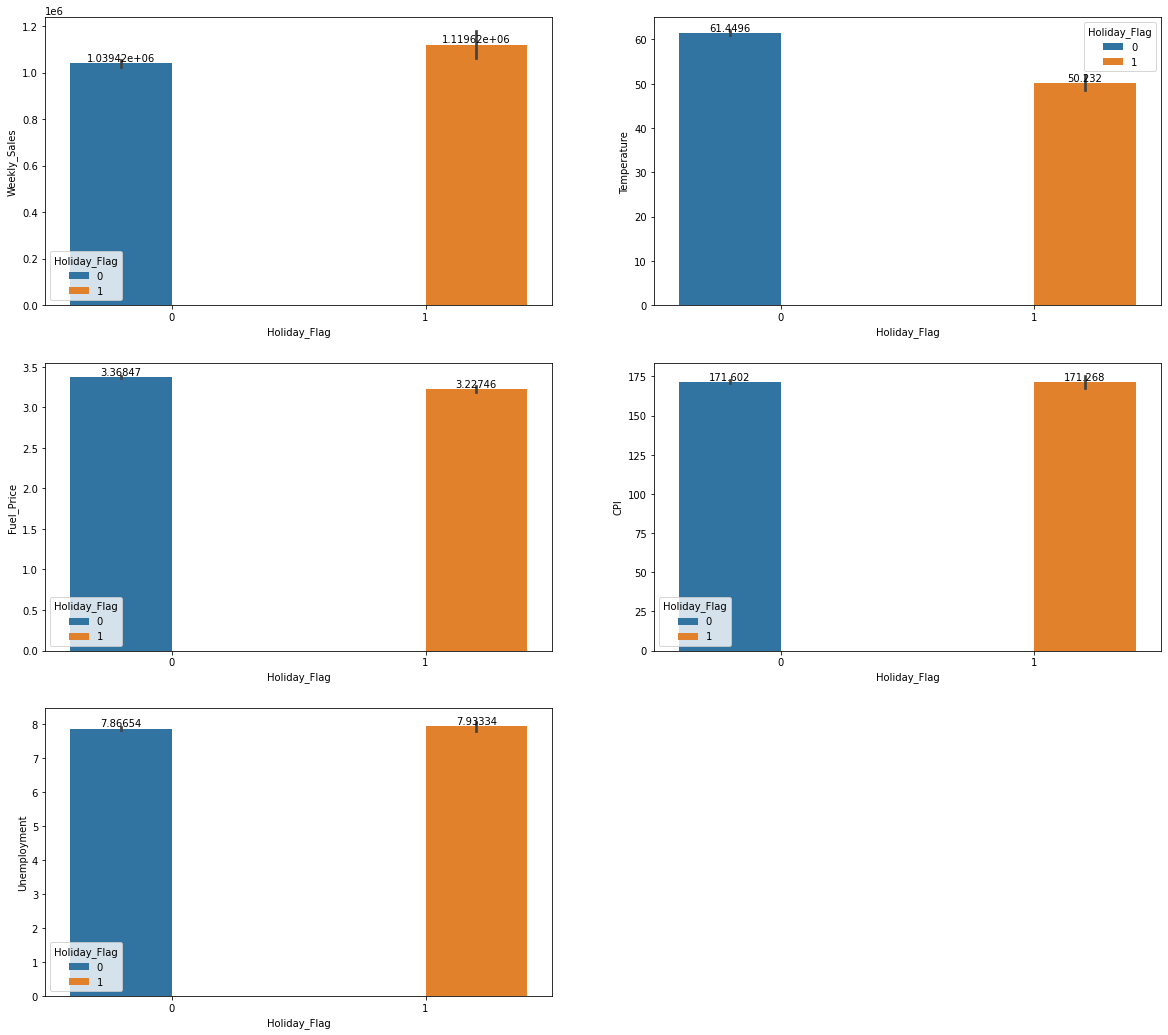

In [112]:
# Bar Plot of Features

from numpy import mean

pno = 1
plt.figure(figsize=(20,18))
for i in ["Weekly_Sales","Temperature","Fuel_Price","CPI","Unemployment",'Store']:
        if pno<=5:
            plt.subplot(3,2,pno)
            ax = sns.barplot(data = df , x = "Holiday_Flag" ,y = i  , hue = df.Holiday_Flag ,estimator=mean);
            pno+=1
            
            for i in ax.containers:     #to set a label on top of the bars.
                ax.bar_label(i,)


In [113]:
# Check Correlation of the features

df.corr()


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.336559,-4.386841e-16,-0.022749,0.060023,-0.209492,0.255964
Weekly_Sales,-3.365589e-01,1.000000,3.670284e-02,-0.060808,0.010998,-0.072627,-0.108662
Holiday_Flag,-4.386841e-16,0.036703,1.000000e+00,-0.155149,-0.078347,-0.002162,0.011204
Temperature,-2.274937e-02,-0.060808,-1.551494e-01,1.000000,0.144962,0.176960,0.088315
Fuel_Price,6.002295e-02,0.010998,-7.834652e-02,0.144962,1.000000,-0.170642,-0.053428
CPI,-2.094919e-01,-0.072627,-2.162091e-03,0.176960,-0.170642,1.000000,-0.278542
Unemployment,2.559643e-01,-0.108662,1.120376e-02,0.088315,-0.053428,-0.278542,1.000000


Text(0.5, 1.0, 'correlation of feature')

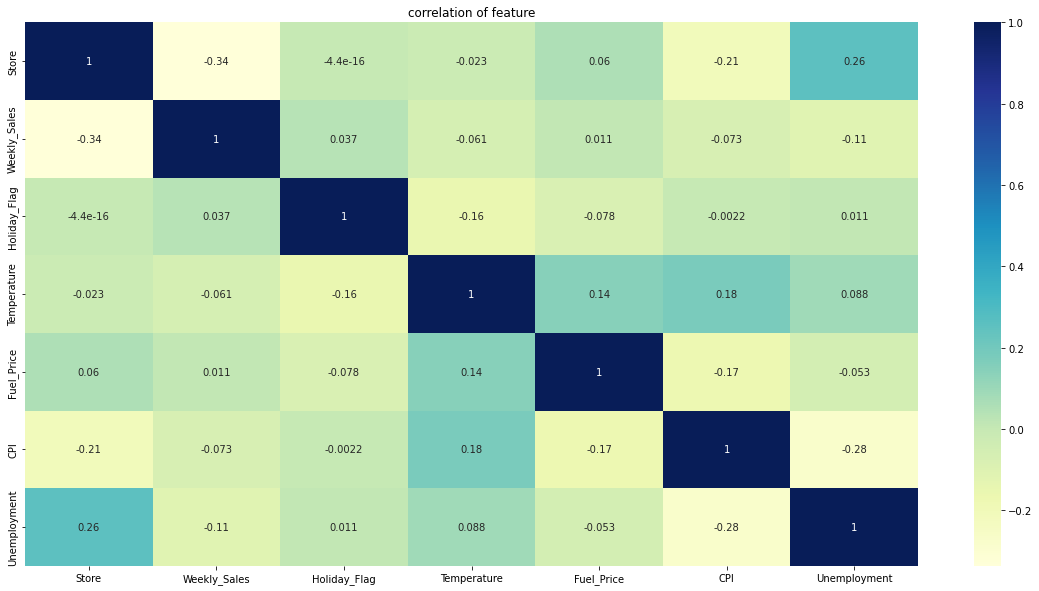

In [114]:
# Heat map of feature correlation

plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot = True , cmap ="YlGnBu")
plt.title("correlation of feature")


In [6]:
# Defining Features

x=df[['Store','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']]

In [7]:
# Defining predictive variable. Dividing it into 2 classes

df['y_class'] = pd.cut(df.Weekly_Sales, bins=[209986.25,960476.1,3818686.45],labels=[0 , 1])
y = df['y_class']

In [8]:
# Lable encoding

y = lab.fit_transform(y)
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,y_class
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,0
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,0
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,0
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,0
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667,0


In [9]:
#Spliting the dataset

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [10]:
# Displaying the shape of test and train dataset

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4504, 6)
(1931, 6)
(4504,)
(1931,)


In [11]:
# Inplementing Logistic Regression

In [12]:
model_regression= LogisticRegression()


In [13]:
# Fit the regression model

model_regression.fit(x_train,y_train)

C:\Users\runvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [14]:
# Predic the model on x_test

y_pred=model_regression.predict(x_test)
y_pred

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [15]:
#Display the co-efficient

model_regression.coef_

array([[-0.11270949, -0.11954193,  0.06471155, -0.05667882,  0.04436056,
        -0.01720472],
       [-0.15201716,  0.12400545,  0.06095614,  0.0698036 ,  0.03609628,
        -0.03975017],
       [ 0.26472665, -0.00446352, -0.1256677 , -0.01312478, -0.08045684,
         0.05695489]])

In [16]:
# Checking the accuracy of model

accuracy =accuracy_score(y_test, y_pred)
accuracy



0.6338684619368203

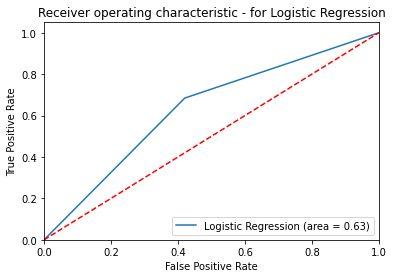

In [115]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic - for Logistic Regression')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [17]:
# Applying the Decision Tree Classifier

In [18]:
# Importing the DecisionTreeClassifier library 

from sklearn.tree import DecisionTreeClassifier


In [19]:

model_decisiontree =  DecisionTreeClassifier()



In [20]:
# Fiting the decision tree classifier
model_decisiontree.fit(x_train,y_train)

DecisionTreeClassifier()

In [21]:
# Predicting the model on x_test

y_pred_DT = model_decisiontree.predict(x_test)


In [22]:
# Checking the accuracy

accuracy_DT =accuracy_score(y_test, y_pred_DT)
accuracy_DT

0.9337131020196789

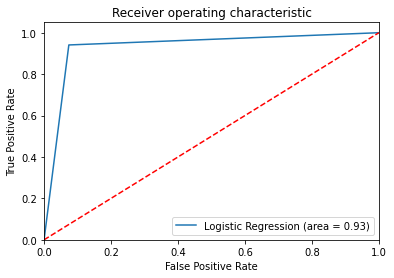

In [88]:
logit_roc_auc = roc_auc_score(y_test, y_pred_DT)
fpr, tpr, thresholds = roc_curve(y_test,y_pred_DT)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [23]:
# Applying the SVM Classification
from sklearn.svm import SVC


In [24]:
# Fitting the SVC model
model_svm = SVC()
model_svm.fit(x_train , y_train)


SVC()

In [25]:
# Predicting the model on x_test
Y_pred_svm = model_svm.predict(x_test)


In [26]:
# Checking the accuracy

accuracy_svm =accuracy_score(y_test, Y_pred_svm)
accuracy_svm

0.6147074054893837

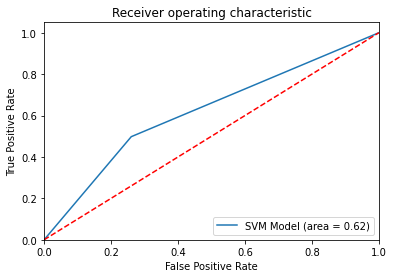

In [93]:
logit_roc_auc = roc_auc_score(y_test, Y_pred_svm)
fpr, tpr, thresholds = roc_curve(y_test,Y_pred_svm)
plt.figure()
plt.plot(fpr, tpr, label='SVM Model (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [27]:
# Implementing the SGD Classifier

from sklearn.linear_model import SGDClassifier


In [28]:

model_sgd = SGDClassifier()



In [29]:
# Fitting the SGB model
model_sgd.fit(x_train , y_train)

SGDClassifier()

In [30]:
# Predicting the model on X_test

Y_pred_sgd = model_sgd.predict(x_test)

In [31]:
# Checking the accuracy

accuracy_sgd =accuracy_score(y_test, Y_pred_sgd)
accuracy_sgd

0.5075090626618333

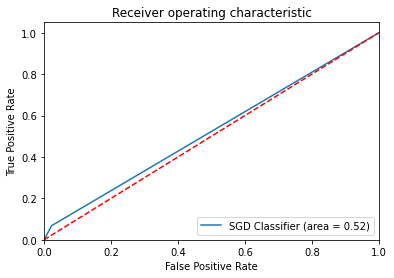

In [94]:
logit_roc_auc = roc_auc_score(y_test, Y_pred_sgd)
fpr, tpr, thresholds = roc_curve(y_test,Y_pred_sgd)
plt.figure()
plt.plot(fpr, tpr, label='SGD Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [32]:
# Implementng the Random Forest Classifier

In [33]:
model_rf = RandomForestClassifier()

In [34]:
# Fiting the random forest classifier

model_rf.fit(x_train , y_train)

RandomForestClassifier()

In [35]:
# Predicting the Random Classifier Model on x_test

Y_pred_rf = model_rf.predict(x_test)

In [36]:
# Checking the accuracy of the Random Forest Classifier model

accuracy_rf =accuracy_score(y_test, Y_pred_rf)
accuracy_rf

0.9502848265147592

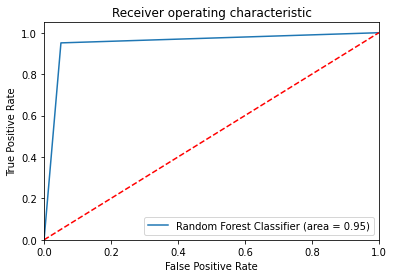

In [95]:
logit_roc_auc = roc_auc_score(y_test, Y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test,Y_pred_rf)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [37]:
# Grid Search for Logistic Regression

In [38]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)




C:\Users\runvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(
C:\Users\runvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\runvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the num

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']})

In [39]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l2'}
accuracy : 0.6290032027593002


In [98]:
y_pred_LR_GS = logreg_cv.predict(x_test)

In [101]:
accuracy_LS_GS = accuracy_score(y_test, y_pred_LR_GS)
accuracy_LS_GS

0.6307612635939928

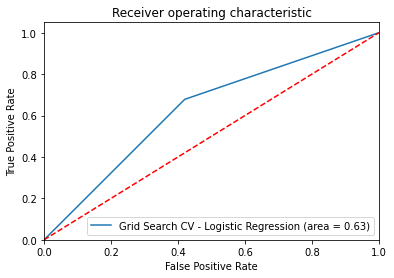

In [102]:
logit_roc_auc = roc_auc_score(y_test, y_pred_LR_GS)
fpr, tpr, thresholds = roc_curve(y_test,y_pred_LR_GS)
plt.figure()
plt.plot(fpr, tpr, label='Grid Search CV - Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


In [40]:
# Grid Search for Decision Tree

In [41]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(x_train, y_train)


Fitting 5 folds for each of 90 candidates, totalling 450 fits


C:\Users\runvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\runvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\runvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\runvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviou

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [42]:
final_model = grid_search.best_estimator_
final_model


DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=1024)

In [43]:
tree_clas = DecisionTreeClassifier(ccp_alpha=0.01, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0,
                       random_state=1024, splitter='best')
tree_clas.fit(x_train, y_train)
y_predict_GS_DT = tree_clas.predict(x_test)

In [44]:
accuracy=accuracy_score(y_test, y_predict_GS_DT)
accuracy

0.6680476437079234

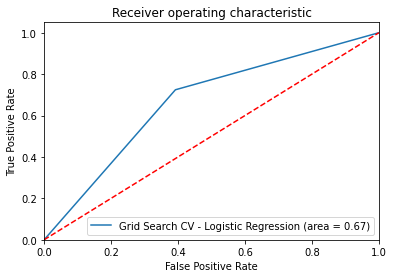

In [103]:
logit_roc_auc = roc_auc_score(y_test, y_predict_GS_DT)
fpr, tpr, thresholds = roc_curve(y_test,y_predict_GS_DT)
plt.figure()
plt.plot(fpr, tpr, label='Grid Search CV - Decision Tree Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [45]:
# Grid Search for Random Forest

In [46]:
rfc=RandomForestClassifier()

In [47]:
'''param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto','sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}'''


"param_grid = { \n    'n_estimators': [200, 500],\n    'max_features': ['auto','sqrt', 'log2'],\n    'max_depth' : [4,5,6,7,8],\n    'criterion' :['gini', 'entropy']\n}"

In [48]:
#GS_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 2)

In [49]:
#GS_rfc.fit(x_train, y_train)

In [50]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]}

#, 100, 110

In [51]:
grid_search = GridSearchCV(estimator = rfc, param_grid = param_grid, 
                          cv = 2, n_jobs = -1, verbose = 2)


In [52]:
grid_search.fit(x_train, y_train)


Fitting 2 folds for each of 144 candidates, totalling 288 fits


C:\Users\runvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [53]:
grid_search.best_params_


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 1000}

In [54]:
y_pred_rf_gs=grid_search.predict(x_test)


In [55]:
accuracy_rf_gs= accuracy_score(y_test,y_pred_rf_gs)

In [56]:
accuracy_rf_gs

0.944070429829104

<function matplotlib.pyplot.show(close=None, block=None)>

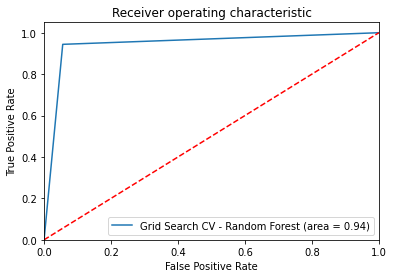

In [105]:
logit_roc_auc = roc_auc_score(y_test, y_pred_rf_gs)
fpr, tpr, thresholds = roc_curve(y_test,y_pred_rf_gs)
plt.figure()
plt.plot(fpr, tpr, label='Grid Search CV - Random Forest (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show

In [57]:
# Grid Search for SGD

In [58]:
params = {
    "loss" : ["squared_hinge","hinge","log","modified_huber"],
    "alpha" : [0.0001,0.001, 0.01, 0.1],
    "penalty" : ["l2","l1","none"],
}

#, "log", "squared_hinge", "modified_huber","hinge",
# none,, "l1"
# 0.0001,0.001, 0.01, 0.1

In [59]:
model_sgd_gs = SGDClassifier(max_iter=10)
clf = GridSearchCV(model_sgd_gs, param_grid=params)


In [60]:
clf.fit(x_test, y_test)



C:\Users\runvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\runvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\runvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\runvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:705: ConvergenceWarning: Maximum number of iteration reached before convergence. Consid

GridSearchCV(estimator=SGDClassifier(max_iter=10),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'loss': ['squared_hinge', 'hinge', 'log',
                                  'modified_huber'],
                         'penalty': ['l2', 'l1', 'none']})

In [61]:
print(clf.best_score_)

0.5800176728119854


In [62]:
print(clf.best_estimator_)


SGDClassifier(alpha=0.01, max_iter=10, penalty='none')


In [63]:
params2 = {
    "loss" : ["square_hinge"],
    "alpha" : [0.1],
    "penalty" : ["none"],
}


In [64]:
clf2 = GridSearchCV(model_sgd_gs, param_grid=params2)

In [65]:
y_pred_gs2=clf.predict(x_test)

In [66]:
accuracy_sgd_gs2=accuracy_score(y_test,y_pred_gs2)

In [67]:
accuracy_sgd_gs2

0.5012946659761781

<function matplotlib.pyplot.show(close=None, block=None)>

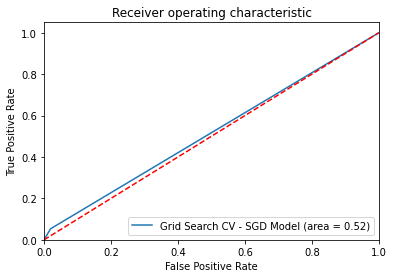

In [106]:
logit_roc_auc = roc_auc_score(y_test, y_pred_gs2)
fpr, tpr, thresholds = roc_curve(y_test,y_pred_gs2)
plt.figure()
plt.plot(fpr, tpr, label='Grid Search CV - SGD Model (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show

In [68]:
# Grid Search for SVM

In [69]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


C:\Users\runvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   1.3s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   1.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   1.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.506 total time=   1.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.507 total time=   1.5s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.737 total time=   1.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.743 total time=   1.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.769 total time=   1.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.737 total time=   1.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.740 total time=   1.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.734 total time=   0.6s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.734 total time=   0.6s
[CV 3/5] END .....C=0.1, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [70]:
# print best parameter after tuning
print(grid.best_params_)
  
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


In [71]:
grid_predictions = grid.predict(x_test)
  
# print classification report


In [72]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       933
           1       0.93      0.93      0.93       998

    accuracy                           0.92      1931
   macro avg       0.92      0.92      0.92      1931
weighted avg       0.92      0.92      0.92      1931



In [73]:
accuracy_svc_gs= accuracy_score(y_test,grid_predictions)

In [74]:
accuracy_svc_gs

0.923873640600725

<function matplotlib.pyplot.show(close=None, block=None)>

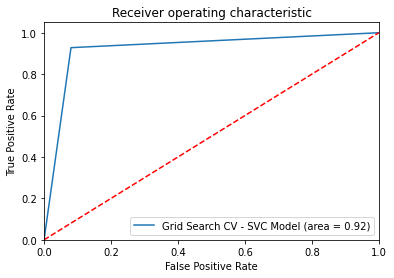

In [107]:
logit_roc_auc = roc_auc_score(y_test, grid_predictions)
fpr, tpr, thresholds = roc_curve(y_test,grid_predictions)
plt.figure()
plt.plot(fpr, tpr, label='Grid Search CV - SVC Model (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show